<a href="https://colab.research.google.com/github/Simran-ch/PRODIGY_ML_TASKS/blob/main/Prodigy_ML_task_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3 : Implement a support vector machine (SVM) to classify images of cats and dogs .

In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
dataset_path = '/content/drive/My Drive/Internship Projects/Prodigy Tasks/Task 3/Data'
train_dir = os.path.join(dataset_path, "train")
test_dir = os.path.join(dataset_path, "test")

In [12]:
categories = ["cats", "dogs"]
img_size = 224

In [13]:
def load_images_from_folder(folder):
    data = []
    labels = []
    for category in categories:
        path = os.path.join(folder, category)
        label = category  # Keep as string for encoding later
        for img_name in os.listdir(path):
            img_path = os.path.join(path, img_name)
            img = cv2.imread(img_path)
            if img is None:
                continue
            img = cv2.resize(img, (img_size, img_size))
            data.append(img)
            labels.append(label)
    return np.array(data, dtype="float32"), np.array(labels)

# Loading the training and testing data

In [14]:
X_train, y_train = load_images_from_folder(train_dir)
X_test, y_test = load_images_from_folder(test_dir)

## Normalize images

In [15]:
X_train = preprocess_input(X_train)
X_test = preprocess_input(X_test)

## Convert labels to numerical format

In [16]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # 0 = Cat, 1 = Dog
y_test = label_encoder.transform(y_test)

## Feature extraction using MobileNetV2

In [17]:
feature_extractor = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")

<ipython-input-17-3c1716b1a0e5>:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  feature_extractor = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Extract features

In [18]:
X_train_features = feature_extractor.predict(X_train)
X_test_features = feature_extractor.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step


## Train SVM classifier

In [19]:
svm_model = SVC(kernel="linear")
svm_model.fit(X_train_features, y_train)

SVC(kernel='linear')

## Predictions

In [20]:
y_pred = svm_model.predict(X_test_features)

## Accuracy

In [21]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 90.00%


## Classification report

In [22]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=categories))


Classification Report:
              precision    recall  f1-score   support

        cats       0.94      0.86      0.90        70
        dogs       0.87      0.94      0.90        70

    accuracy                           0.90       140
   macro avg       0.90      0.90      0.90       140
weighted avg       0.90      0.90      0.90       140



## Visualizing some test images with predictions

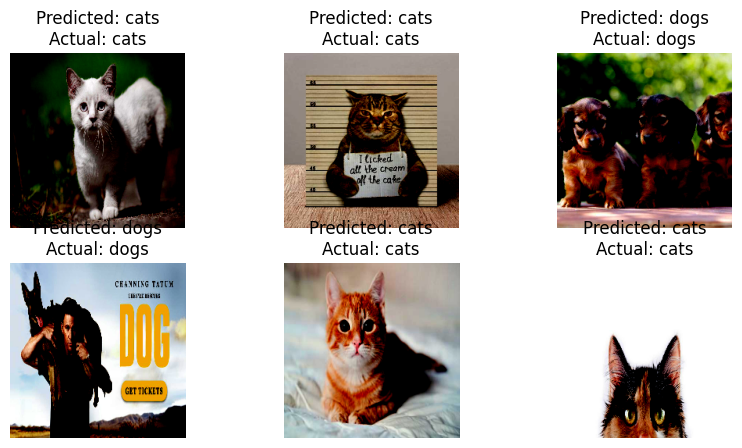

In [24]:
plt.figure(figsize=(10, 5))
for i in range(6):
    idx = np.random.randint(0, len(y_test))
    img = X_test[idx]
    plt.subplot(2, 3, i + 1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(f"Predicted: {categories[y_pred[idx]]}\nActual: {categories[y_test[idx]]}")
    plt.axis("off")
plt.show()